K-Means Algorithm Steps:
Initialize the centroids:

Choose k random points from the data set as the initial centroids. These centroids represent the center of the clusters.
Assign each data point to the nearest centroid:

For each data point, compute the distance to each centroid (usually using Euclidean distance).
Assign the data point to the cluster whose centroid is closest.
Update the centroids:

For each cluster, compute the mean of all data points assigned to that cluster. This new mean becomes the updated centroid.
Repeat:

Repeat steps 2 and 3 until the centroids no longer change significantly (or until a maximum number of iterations is reached).
Stopping criteria:

The algorithm stops when the centroids do not change, or the changes are below a predefined threshold.

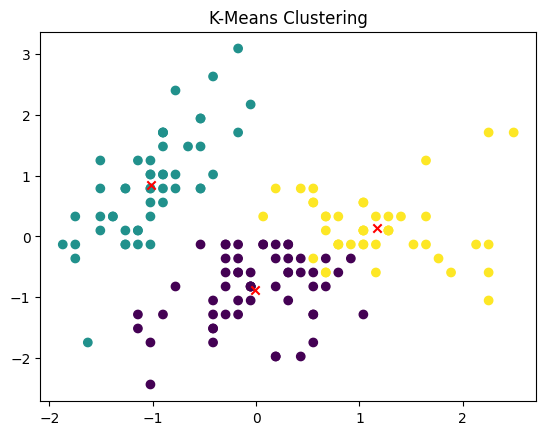

In [4]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Function to load and scale the Iris dataset
def load_data():
    data = load_iris()
    X = data.data  # Only features
    X = StandardScaler().fit_transform(X)  # Standardize the data for better performance
    return X

# Function to initialize random centroids
def initialize_centroids(X, k):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    return centroids

# Function to compute the distance between points and centroids
def compute_distances(X, centroids):
    distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids])
    return distances

# Function to assign points to the nearest centroid
def assign_clusters(X, centroids):
    distances = compute_distances(X, centroids)
    return np.argmin(distances, axis=0)

# Function to update centroids by calculating the mean of assigned points
def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# KMeans Algorithm using functions
def kmeans(X, k=3, max_iters=100, tol=1e-4):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(X, k)
    
    for i in range(max_iters):
        # Step 2: Assign clusters
        labels = assign_clusters(X, centroids)
        
        # Step 3: Update centroids
        new_centroids = update_centroids(X, labels, k)
        
        # Step 4: Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Function to visualize the clusters (only 2 features for simplicity)
def visualize_clusters(X, labels, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.title("K-Means Clustering")
    plt.show()

# Main function to execute the KMeans algorithm and visualize
def main():
    X = load_data()  # Load and scale the Iris dataset
    k = 3  # Number of clusters for the Iris dataset
    centroids, labels = kmeans(X, k)  # Apply KMeans algorithm
    visualize_clusters(X, labels, centroids)  # Visualize the results


if __name__ == "__main__":
    main()


In [7]:
import numpy as np

class KMeans:
    def __init__(self, k=2, max_iters=100, tol=1e-4):
        self.k = k  # Number of clusters
        self.max_iters = max_iters  # Maximum number of iterations
        self.tol = tol  # Tolerance to stop iteration

    def fit(self, X):
        # Step 1: Initialize centroids randomly from data points
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for i in range(self.max_iters):
            # Step 2: Assign each point to the nearest centroid
            self.labels = self._assign_clusters(X)

            # Step 3: Update centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            # Step 4: Check for convergence (if centroids do not change significantly)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            # Update the centroids with the new values
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        # Compute the Euclidean distance between each point and the centroids
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        # Assign each point to the closest centroid
        return np.argmin(distances, axis=0)

    def predict(self, X):
        # Assign each point to the nearest centroid
        return self._assign_clusters(X)


if __name__ == "__main__":
    # Generate some random data for clustering
    np.random.seed(42)
    # X = np.vstack((np.random.randn(100, 2) + np.array([5, 5]), np.random.randn(100, 2)))
    X = load_data()  # Load and scale the Iris dataset
    # Fit KMeans algorithm to the data
    kmeans = KMeans(k=2)
    kmeans.fit(X)


    # Output centroids and labels
    print("Centroids:\n", kmeans.centroids)
    print("Cluster Assignments:", kmeans.predict(X))


Centroids:
 [[ 0.50728948 -0.42663134  0.65249366  0.62744675]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]
Cluster Assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


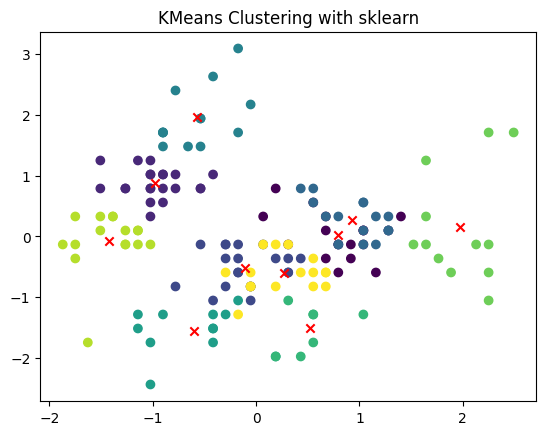

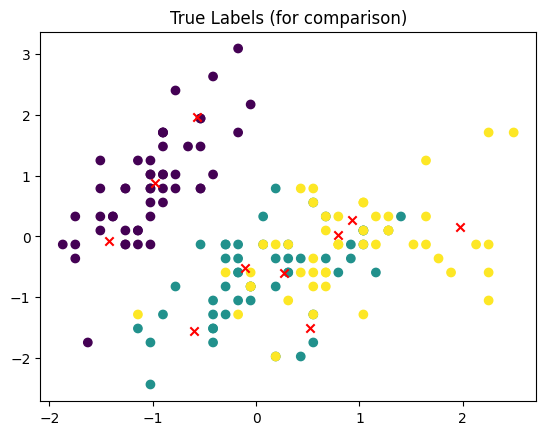

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
def load_data():
    data = load_iris()
    X = data.data  # Only features
    y = data.target  # True labels (for comparison, not used in clustering)
    X = StandardScaler().fit_transform(X)  # Standardize the data for better performance
    return X, y

# Function to visualize clusters (using two features for simplicity)
def visualize_clusters(X, labels, centroids, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.title(title)
    plt.show()

# Main function using sklearn's KMeans
def main():
    # Step 1: Load and scale data
    X, true_labels = load_data()

    # Step 2: Apply KMeans clustering using sklearn
    kmeans = KMeans(n_clusters=10, random_state=42)
    predicted_labels = kmeans.fit_predict(X)
    
    # Step 3: Extract the learned centroids
    centroids = kmeans.cluster_centers_

    # Step 4: Visualize the predicted clusters and centroids
    visualize_clusters(X, predicted_labels, centroids, "KMeans Clustering with sklearn")

    # Step 5: Optionally, compare with true labels for analysis
    visualize_clusters(X, true_labels, centroids, "True Labels (for comparison)")


if __name__ == "__main__":
    main()


To determine the optimal number of clusters 
𝐾
K for the K-Means algorithm, there are several validation techniques you can use. The most common methods include:


1. Elbow Method
The Elbow Method is based on plotting the inertia (sum of squared distances between each point and its assigned centroid) for different values of 

K. The "elbow" point is where the inertia starts diminishing more slowly, suggesting a good number for 
𝐾
K.

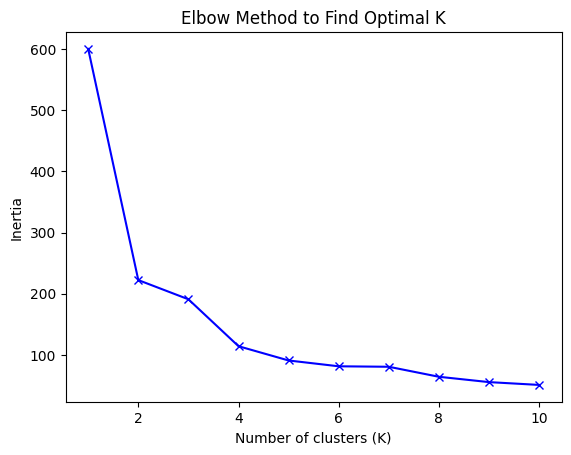

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to perform the Elbow Method
def elbow_method(X, max_k=10):
    inertias = []

    # Calculate inertia for a range of K values
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Plot the inertia values for each K
    plt.plot(range(1, max_k+1), inertias, 'bx-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method to Find Optimal K')
    plt.show()

# Call the function (assuming you have X already loaded)
elbow_method(X)



In the Elbow Method plot you have shared, the "elbow" is the point where the inertia (within-cluster sum of squares) starts decreasing at a slower rate. The optimal number of clusters is typically at the location of this elbow.

From your plot, it looks like the elbow occurs at K = 3, as this is the point where the sharp drop in inertia begins to level off.

Thus, K = 3 seems to be a good number of clusters for your dataset.

2. Silhouette Score
The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters. The score ranges from -1 to 1:

A score close to 1 indicates that the points are well-clustered.
A score close to 0 indicates overlapping clusters.
A negative score indicates that points are assigned to the wrong clusters.

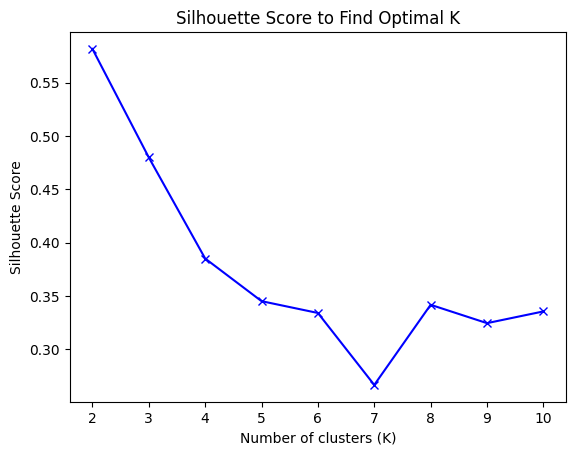

In [11]:
from sklearn.metrics import silhouette_score

# Function to compute silhouette scores for a range of K values
def silhouette_method(X, max_k=10):
    silhouette_scores = []

    # Calculate silhouette score for a range of K values
    for k in range(2, max_k+1):  # Silhouette score requires at least 2 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

    # Plot the silhouette scores for each K
    plt.plot(range(2, max_k+1), silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score to Find Optimal K')
    plt.show()


silhouette_method(X)


In the Silhouette Score plot you provided, the goal is to select the 
𝐾
K that maximizes the Silhouette Score, which indicates well-separated and cohesive clusters.

From the plot:

The highest Silhouette Score is at K = 2, suggesting that 2 clusters yield the best clustering result according to this metric.
Thus, the optimal number of clusters according to the Silhouette Score method is K = 2 in this case.

/var/folders/nh/xwjzchhs26b2g_tvt7fqtqtw0000gn/T/ipykernel_12675/4167343993.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis', np.max(labels) + 1)


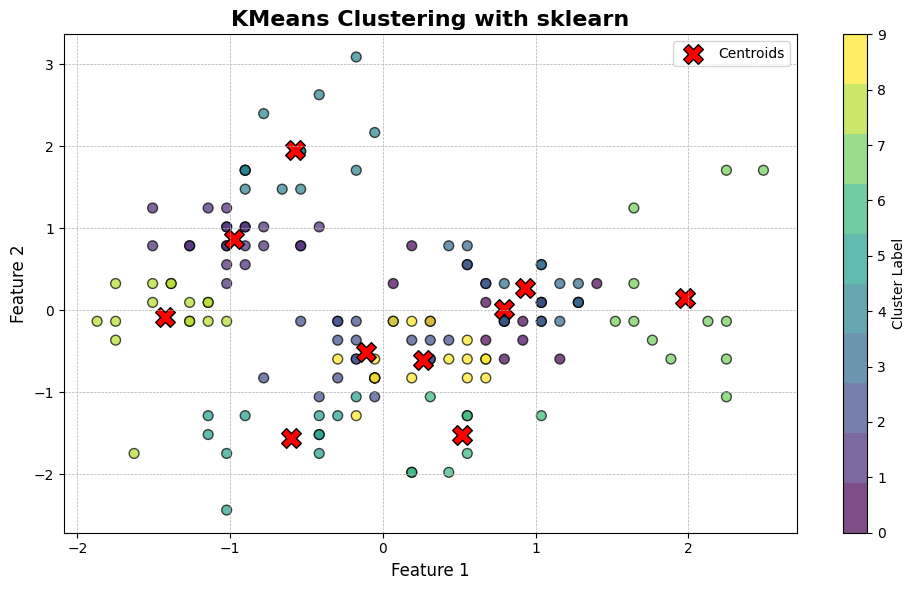

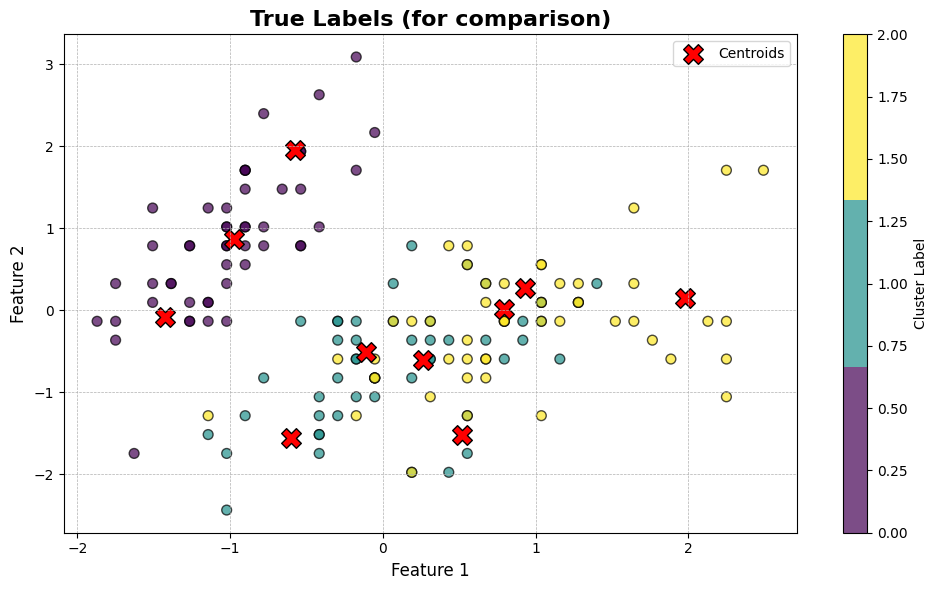

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import cm

# Load the Iris dataset
def load_data():
    data = load_iris()
    X = data.data  # Only features
    y = data.target  # True labels (for comparison, not used in clustering)
    X = StandardScaler().fit_transform(X)  # Standardize the data for better performance
    return X, y

# Function to visualize clusters (using two features for simplicity)
def visualize_clusters(X, labels, centroids, title):
    # Define a color map and create a scatter plot with better colors and markers
    colors = cm.get_cmap('viridis', np.max(labels) + 1)
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap=colors, s=50, alpha=0.7, edgecolor='k')
    
    # Plot the centroids with a different marker and size
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids', edgecolor='black')

    # Add a color bar to represent different clusters
    cbar = plt.colorbar(scatter)
    cbar.set_label('Cluster Label')

    # Add title and labels
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)

    # Add a legend
    ax.legend(loc='best')

    # Improve plot aesthetics
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    # Show the plot
    plt.show()

def main():
    # Step 1: Load and scale data
    X, true_labels = load_data()

    # Step 2: Apply KMeans clustering using sklearn
    kmeans = KMeans(n_clusters=10, random_state=42)  # Change K based on your chosen value
    predicted_labels = kmeans.fit_predict(X)
    
    # Step 3: Extract the learned centroids
    centroids = kmeans.cluster_centers_

    # Step 4: Visualize the predicted clusters and centroids
    visualize_clusters(X, predicted_labels, centroids, "KMeans Clustering with sklearn")

    # Step 5: Optionally, compare with true labels for analysis
    visualize_clusters(X, true_labels, centroids, "True Labels (for comparison)")

if __name__ == "__main__":
    main()
